# Como Promover o Desenvolvimento Sustentável dos Municípios da Amazônia Legal?

## Questão 1 - Quais municípios são componentes da Amazônia Legal?

A Amazônia Legal é dividida em duas partes: a Amazônia Ocidental, composta pelos estados do **Amazonas**, **Acre**, **Rondônia** e **Roraima**, e a Amazônia Oriental, composta, por exclusão, pelos estados do **Pará**, **Maranhão**, **Amapá**, **Tocantins** e **Mato Grosso**. Ao todo são **9 estados**.

fonte: https://www.ibge.gov.br/geociencias/cartas-e-mapas/mapas-regionais/15819-amazonia-legal.html?=&t=acesso-ao-produto

Para responder a questão central, ramificamos o problema em várias partes. No âmbito das questões ambientais que se relacionam com o desenvolvimento sustentável da região em questão, fazemos a seguinte pergunta:

## Questão 2 - Quais regiões devem ser as prioritárias para restauração florestal?

Para responder a esta pergunta, precisamos primeiro definir critérios de priorização. Para tanto, começamos falando do objetivo da restauração florestal.

**Qual a importância da restauração florestal?**

A restauração Florestal contribui para mitigar as mudanças climáticas, adaptar sistemas produtivos às condições do clima e promover a economia florestal.  

A cada dia se observa uma diminuição na cobertura florestal, devido a uma série de fatores. Neste contexto, surge a economia florestal, que trata exatamente da utilização racional dos recursos, com vistas à produção, à distribuição e ao consumo dos bens e serviços florestais.

Em resumo, a restauração florestal deve então se preocupar em: reduzir as mudanças climáticas, adaptar os sistemas de produção florestal as condições climáticas e, finalmente, promover a utilização racional dos recursos florestais.

**Critérios para definição de prioridade**

Dito isso, as regiões que devem ser priorizadas para restauração florestal são aquelas que mais sofrem com os três quesitos apontados acima, i.e., mudanças climáticas e utilização irracional de recursos.

## Questão 3 - Quais dados usar?

Comecarei olhando para as seguintes bases **já filtradas**:
* Exportações
* Produção Agrícola
* Cadastro Ambiental Rural
* Mapbiomas - Alerta
* Mapbiomas - Transição
* Mapbiomas - Cobertura
* De-para Municípios

In [1]:
path = './dados_filtrados/'

## Questão 4 - Que tipo de análises relevantes podemos fazer em cada base de dados?

Aqui, desejo olhar para as variáveis de cada base e construir análises que sejam relevantes para responder a **Questão 2**.

In [2]:
import pandas as pd
import numpy as np

#### 4.1 - Dados de Exportações

In [3]:
expt = pd.read_csv(path+'exportacoes_filtrado.csv')
expt.head()

,Year,Month,City,SH4 Code,SH2 Code,Economic Block,US$ FOB,Net Weight
0,2010,1,Castanhal - PA,904,9,Europe,39750,15000
1,2010,1,Araguaína - TO,202,2,Africa (minus MIDDLE EAST),1250675,395681
2,2010,1,Castanhal - PA,904,9,Africa (minus MIDDLE EAST),74103,28000
3,2010,1,Vilhena - RO,202,2,Africa (minus MIDDLE EAST),351563,125064
4,2010,1,Ariquemes - RO,9406,94,Africa (minus MIDDLE EAST),50000,37600


Primeiro vou ver as exportações acumuladas de cada estado da Amazônia Legal.

In [4]:
expt['State'] = expt['City'].apply(lambda s: s.split('-')[1])
expt['City'] = expt['City'].apply(lambda s: s.split('-')[0])

<AxesSubplot:xlabel='State'>

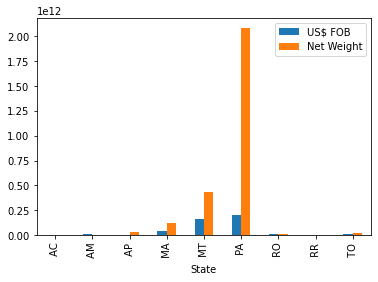

In [5]:
expt.groupby('State').sum()[['US$ FOB', 'Net Weight']].plot(kind = 'bar')

<AxesSubplot:xlabel='State'>

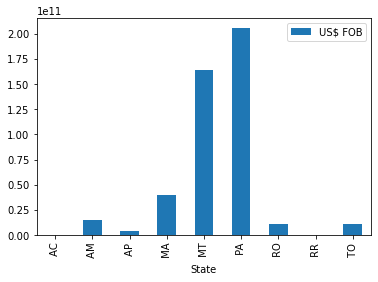

In [6]:
expt.groupby('State').sum()[['US$ FOB']].plot(kind = 'bar')

No acumulado de peso líquido exportado, o estado do Pará fica na frente com uma grande vantagem. Ao mesmo tempo, quando olhamos para o total de ganhos com exportações, o estado permanece na frente mas desta vez com uma vantagem bem menos expressiva. 

Também vale notar que as duas variáves observadas estão distribuidas entre os estados de maneira muito parecida, o que já era de se esperar já que existe correlação direta entre volume exportado e ganhos com exportações. Sendo assim, vou criar uma variável chamada `US_per_ton` que é obtida pela razão entre `US FOB` e `Net Weight/1000`.

Parece que existe uma inconsistência. A coluna `Net Weight` tem algumas entradas com valor `0` ao mesmo tempo que estas observaçoes possuem entradas não nulas na coluna `US FOB`. Vou assumir que os valores de exportações devem ser nulos quando a quantidade exportada também é nula.

<AxesSubplot:xlabel='State'>

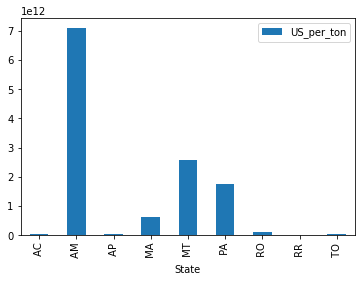

In [7]:
expt.loc[expt[expt['Net Weight'] == 0].index, ['Net Weight']] = 0.001
expt.loc[expt[expt['Net Weight'] == 0].index, ['US$ FOB']] = 0

expt['US_per_ton'] = expt['US$ FOB']/(expt['Net Weight']/1000)

expt.groupby('State').sum()[['US_per_ton']].plot(kind = 'bar')

Agora vemos que os estados do Mato Grosso e Amazonas aparecem na liderança, seguidos pelo estado do Pará.

**Pergunta**: Por qual razão o Pará exporta em grandes quantidades e ainda assim "ganha" menos que outros?

**Estratégia 1**: Observar uma curva de exportações nos ultimos meses e identificar aquelas regiões que estão com as exportações em queda. Verificar então se existe uma relação de causa e efeito entre quedas nas exportações e fatores ambientais como mudanças climáticas, escassez de recursos etc. Caso positivo, indicar estas regiões como prioritárias.

In [21]:
expt['Period'] = pd.to_datetime( expt['Month'].astype(str).apply(lambda s: s+'-')+expt['Year'].astype(str), format=("%m-%Y"))\
                .dt.to_period('M')

In [31]:
agg.unstack(level=0)

US_per_ton                                                          \
State              AC            AM            AP            MA            MT   
Period                                                                          
2010-01  7.566550e+05  2.654662e+11  3.823330e+07  2.610075e+09  2.519589e+08   
2010-02  6.328256e+07  6.041952e+10  1.013505e+06  3.853082e+09  3.767554e+07   
2010-03  4.025994e+06  5.488371e+10  4.159044e+04  7.700105e+09  1.070342e+08   
2010-04  5.768442e+07  4.832563e+10  1.139155e+05  7.593138e+09  1.837436e+08   
2010-05  7.392199e+07  1.078498e+11  3.109530e+05  1.396618e+10  7.546613e+07   
...               ...           ...           ...           ...           ...   
2020-08  7.759373e+05  4.323490e+10  2.918281e+08  5.666919e+08  7.800092e+10   
2020-09  1.383599e+06  2.765752e+10  1.428840e+08  7.398971e+08  3.742854e+08   
2020-10  1.191957e+06  1.237513e+11  4.458022e+09  1.231732e+09  4.299443e+08   
2020-11  3.911846e+07  4.519688e+10  1.409184e+10  2.732339e+09  3.622221e+08   
2020-12  1.680331e+06  1.713323e+11  1.472436e+08  4.485787e+09  3.947834e+08   

                                                                 
State              PA            RO            RR            TO  
Period                                                           
2010-01  4.373506e+07  1.011665e+06  1.961265e+04  9.439962e+05  
2010-02  4.611163e+07  1.504436e+06  7.565275e+04  7.053069e+04  
2010-03  5.135229e+06  9.361822e+05  1.324812e+04  1.656344e+06  
2010-04  1.149709e+08  1.478964e+06  6.429963e+04  1.120925e+08  
2010-05  4.510548e+07  1.515942e+06  4.303594e+05  1.853752e+06  
...               ...           ...           ...           ...  
2020-08  3.745415e+08  6.554340e+05  5.899493e+08  1.040967e+06  
2020-09  4.393128e+08  2.752400e+07  4.743298e+08  2.178715e+09  
2020-10  5.980226e+08  3.415799e+06  1.397766e+08  9.333076e+05  
2020-11  1.980787e+09  4.933578e+09  1.681598e+06  2.568000e+05  
2020-12  2.169308e+08  7.280292e+05  7.450384e+07  1.876287e+07  

[132 rows x 9 columns]

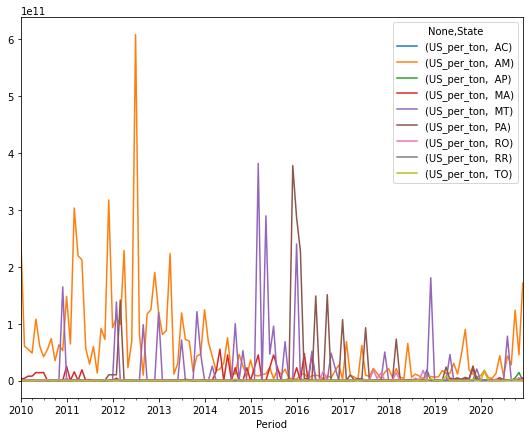

In [33]:
agg = expt[['Period', 'State', 'US_per_ton']].groupby(['State', 'Period']).sum()

ax = agg.unstack(level=0).plot(kind='line', subplots=False, figsize=(9, 7), layout=(1, 1))

#### 4.2 - Produção Agrícola

In [34]:
agrc = pd.read_csv(path+'PAM_filtrado.csv')
agrc.head(7)

,geo_id,ano,area_colhida_v0,area_plantada_dest_colheita_v0,valor_v0
0,1100015,2003,25084.0,25114.0,24813.0
1,1100023,2003,15253.0,15933.0,35136.0
2,1100031,2003,7672.0,7722.0,13157.0
3,1100049,2003,25929.0,26274.0,35099.0
4,1100056,2003,9623.0,9680.0,15958.0
5,1100064,2003,7573.0,7883.0,10877.0
6,1100072,2003,6843.0,6927.0,9882.0


Primeiro vou tratar os valores faltantes da seguinte forma:

1) Se `area_colhida_v0 == NaN` e `area_plantada_dest_colheita_v0 > 0 & valor_v0 > 0` então faço a atribuição `area_colhida_v0 = area_plantada_dest_colheita_v0`;

2) Se `area_colhida_v0 == NaN` e `area_plantada_dest_colheita_v0 > 0 & valor_v0 == NaN` então faço a atribuição `area_colhida_v0 = 0` e também `valor_v0 = 0`;

3) Se `area_colhida_v0 > 0` e `area_plantada_dest_colheita_v0 == NaN` faço a atribuição `area_plantada_dest_colheita_v0 = area_colhida_v0` independente do que estivar na coluna `valor_v0`

4) Se `area_colhida_v0 != 0 & area_plantada_dest_colheita_v0 != 0` ao mesmo tempo que `valor_v0 == NaN`, então talvez podemos pensar em um modelo para preencher os valores faltandas de `valor_v0`.

5) Se todas as três variáveis forem `NaN` para um mesma entrada, então eu dropo a linha.

6) Se `area_colhida_v0 == NaN` ao mesmo tempo que `area_plantada_dest_colheita_v0 == NaN`, então esta linha tbm será dropada.


In [35]:
## --- dropando linhas que tenham NaN nos dados de colheita e plantação simultaneamente
index = agrc['area_colhida_v0'].isna() & agrc['area_plantada_dest_colheita_v0'].isna()
index = index[index==True].index

agrc.drop(index, axis=0, inplace=True)

## --- atribuindo valores de area plantada para entradas que tenham valores de colheita != 0
index = agrc[(~agrc['area_colhida_v0'].isna()) & (agrc['area_colhida_v0']> 0)].index

for ind in index:
    if agrc.loc[ind, 'area_plantada_dest_colheita_v0'] == np.nan:
        agrc.loc[ind, 'area_plantada_dest_colheita_v0'] = agrc.loc[ind, 'area_colhida_v0']
    else:
        pass
    
## --- trocando NaN por 0 onde plantação é válida e também (colheita & valor_v0) são iguais a NaN
index = agrc[(agrc['area_colhida_v0'].isna()) & (agrc['valor_v0'].isna())].index
agrc.loc[index, ['area_colhida_v0', 'valor_v0']] = 0


## --- atribuindo zero onde area colhida é igual a NaN e valor == 0
index = agrc[agrc['valor_v0'] == 0].index
for ind in index:
    if np.isnan(agrc.loc[ind, 'area_colhida_v0']):
        agrc.loc[ind, 'area_colhida_v0'] = 0
    else:
        pass
        
## --- assumindo que colheita == plantacao onde (colheita == NaN) & (valor_v0 > 0)        
index = agrc[agrc['valor_v0'] > 0].index

for ind in index:
    if agrc.loc[ind, 'area_colhida_v0'] == np.nan:
        agrc.loc[ind, 'area_colhida_v0'] = agrc.loc[ind, 'area_plantada_dest_colheita_v0']
        
## --- dropando os NaN que restaram da coluna valor
agrc.dropna(axis=0, how='any', subset=['valor_v0'], inplace=True)


Agora vou criar a coluna `frac_area_colhida_plant` que indica a razão entre a área colhida e a área plantada. 

In [36]:
agrc['frac_area_colhida_plant'] = agrc['area_colhida_v0']/agrc['area_plantada_dest_colheita_v0']

## --- agora, quando frac == 0 significa: ou eu não colhi nada, ou não plantei nada (tomar cuidado ao agregar)
agrc['frac_area_colhida_plant'].fillna(0, inplace=True)


In [37]:
agrc.head()

,geo_id,ano,area_colhida_v0,area_plantada_dest_colheita_v0,valor_v0,frac_area_colhida_plant
0,1100015,2003,25084.0,25114.0,24813.0,0.998805
1,1100023,2003,15253.0,15933.0,35136.0,0.957321
2,1100031,2003,7672.0,7722.0,13157.0,0.993525
3,1100049,2003,25929.0,26274.0,35099.0,0.986869
4,1100056,2003,9623.0,9680.0,15958.0,0.994112


**Estratégia 1:** Separar por geo_id e verificar as regiões com menor valor médio de `frac_area_colhida_plant`. Este resultado indicará possíveis regiões que mais sofrem com questões ambientais.

**Estratégia 2:** Para as áreas indicadas na estratégia enterior, fazer uma curva de projeção da variável `frac_area_colhida_plant` para os próximos meses. Aquelas em maior tendência de queda deverão ser priorizadas.

**Alerta**: Lembrar também de verificar relação de causa e efeito com dados ambientais conforme feito em 4.1.

<AxesSubplot:xlabel='geo_id'>

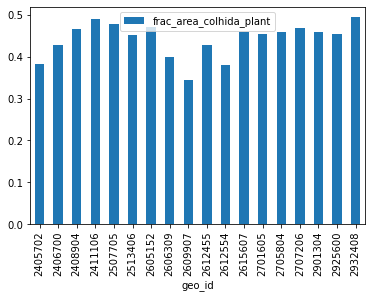

In [60]:
agg1 = agrc[['geo_id', 'frac_area_colhida_plant']].groupby('geo_id').median()

agg1[(agg1['frac_area_colhida_plant'] < 0.5) & (agg1['frac_area_colhida_plant'] != 0.)].plot(kind='bar')

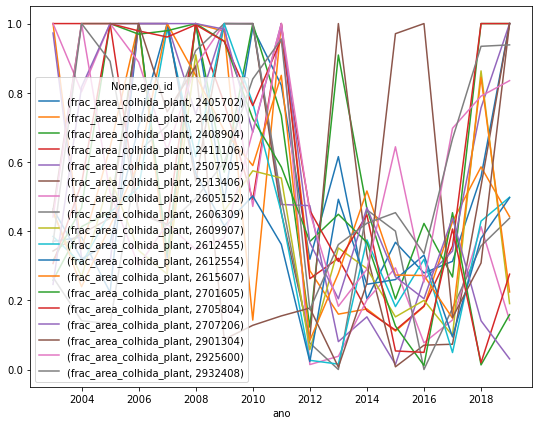

In [66]:
agg2 = agrc[['geo_id', 'ano', 'frac_area_colhida_plant']].groupby(['geo_id', 'ano']).sum()
index = agg1[(agg1['frac_area_colhida_plant'] < 0.5) & (agg1['frac_area_colhida_plant'] != 0.)].index
agg2 = agg2.loc[index]

## --- Pensar em como melhorar essa granularidade

ax = agg2.unstack(level=0).plot(kind='line', subplots=False, figsize=(9, 7), layout=(1, 1))